<font color='green' size = 5> An Alternative Method for Quantum Phase Estimation </font>

This code implements an alternative quantum phase estimation (QPE) algorithm and compares it to the standard approach. The standard QPE algorithm is difficult to implement for certain qubit platforms because it employs controlled phase gates. The alternative QPE algorithm uses a gate sequence which involves only CNOT gates and ordinary phase gates. This makes the QPE algorithm more hardware friendly for certain qubit platforms. The comparison below demonstrates the equivalence between the two methods through a simple example. The equivalence can be proven rigorously for the general case using linear algebra.

In [1]:
from qiskit import *
from qiskit.visualization import *
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as P


In [2]:
countingqubits = 5; theta = 3*(math.pi/2);
def apply_inverse_qft(circuit,numqubits):
    for i in range(numqubits//2):
        circuit.swap(i,numqubits-i-1)
    for j in range(numqubits):
        for k in range(j):
            circuit.cp(-math.pi/float(2**(j-k)), k, j)
        circuit.h(j);

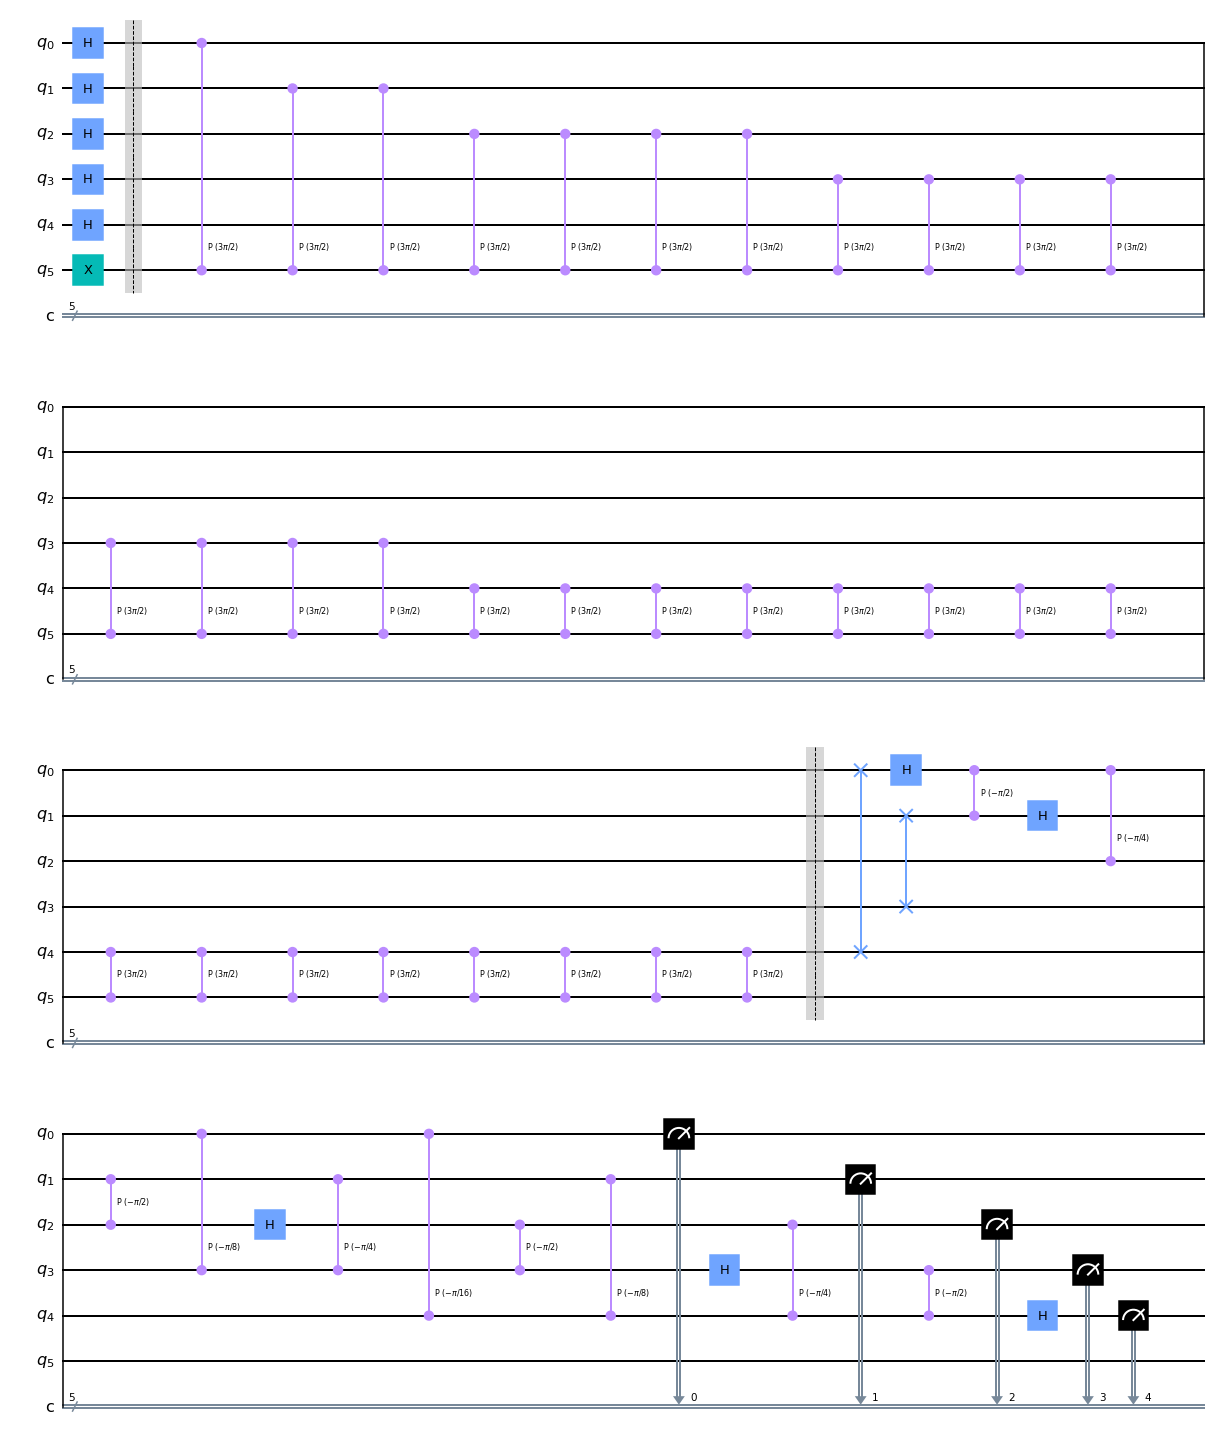

In [3]:
qpe = QuantumCircuit(countingqubits+1,countingqubits);
qpe.x(countingqubits);
for i in range(countingqubits):
    qpe.h(i)
reps = 1;

qpe.barrier();

for j in range(countingqubits):
    for k in range(reps):
        qpe.cp(theta, j, countingqubits);
    reps *= 2
    
qpe.barrier();

apply_inverse_qft(qpe, countingqubits);  
    
for i in range(countingqubits):
    qpe.measure(i,i)    
    
%matplotlib inline   

qpe.draw('mpl')
    

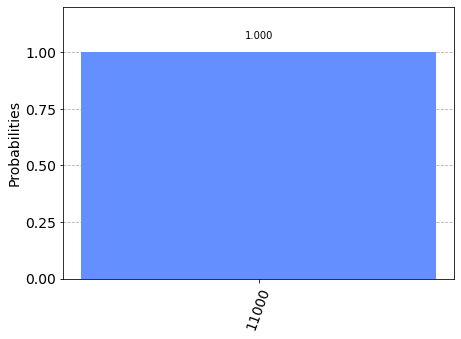

In [4]:
simulator = Aer.get_backend('aer_simulator'); 
shots = 2048; 
t_qpe = transpile(qpe, simulator); 
qobj = assemble(t_qpe, shots=shots)
results = simulator.run(qobj).result(); 
answer = results.get_counts()
plot_histogram(answer)

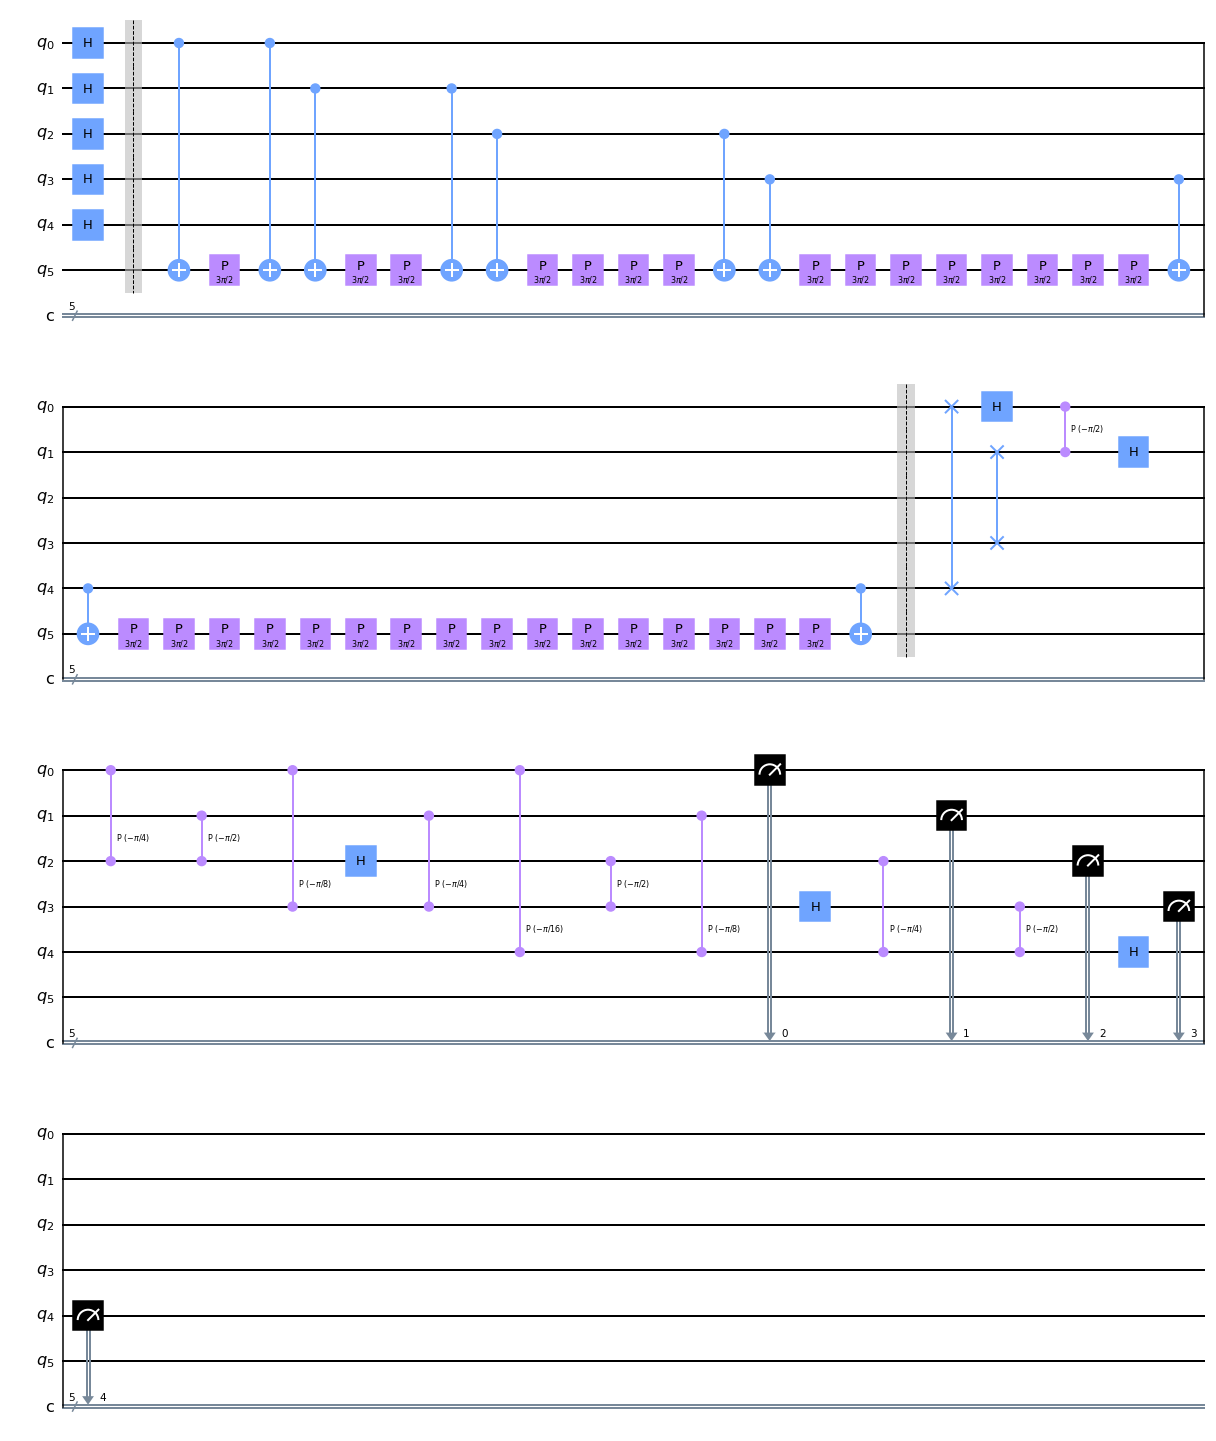

In [5]:
qpe2 = QuantumCircuit(countingqubits+1,countingqubits);
for i in range(countingqubits):
    qpe2.h(i)
reps = 1;

qpe2.barrier()

for j in range(countingqubits):
    qpe2.cx(j,countingqubits)
    for k in range(reps):
        qpe2.p(theta, countingqubits);
    qpe2.cx(j,countingqubits)
    reps *= 2
    
qpe2.barrier();

apply_inverse_qft(qpe2, countingqubits);  
    
for i in range(countingqubits):
    qpe2.measure(i,i)
    
qpe2.draw('mpl')
    


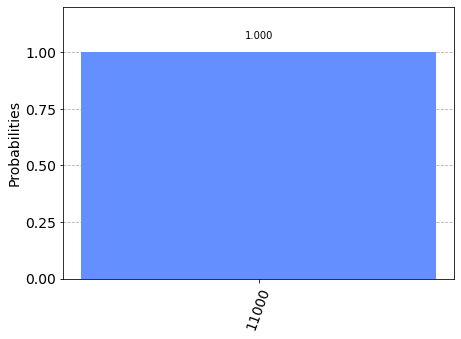

In [6]:
simulator = Aer.get_backend('aer_simulator'); 
shots = 2048; 
t_qpe = transpile(qpe2, simulator); 
qobj = assemble(t_qpe, shots=shots)
results = simulator.run(qobj).result(); 
answer = results.get_counts()
plot_histogram(answer)


As visible, the two methods produce the same results.